<a href="https://colab.research.google.com/github/prof-Anurag/Machine-Learning-Projects-Collection/blob/main/Calories_Burnt_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# Loading the data from csv file to a pandas DataFrame.
calories=pd.read_csv('/content/calories.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data=pd.read_csv('/content/exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
# Combining the Two DataFrame.
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_data.shape

(15000, 9)

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


# *Data Visualisation*

<ipython-input-10-b58fd8416350>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=calories_data,width=0.4,palette={'male': '#1f77b4', 'female': '#ff7f0e'})


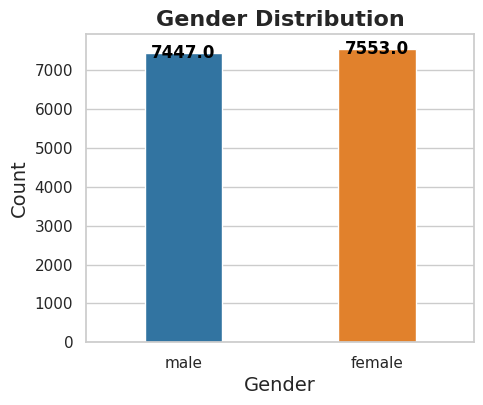

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(5,4))
sns.countplot(x='Gender',data=calories_data,width=0.4,palette={'male': '#1f77b4', 'female': '#ff7f0e'})
plt.title('Gender Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Count',fontsize=14)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', fontweight='bold')
plt.show()

<Figure size 500x400 with 0 Axes>

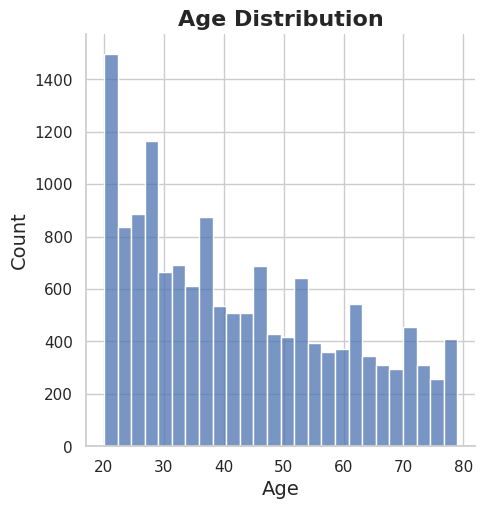

In [ ]:
# Distribution of 'Age' column.
plt.figure(figsize=(5,4))
sns.displot(calories_data['Age'])
plt.title('Age Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

<ipython-input-12-83bf732185a5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


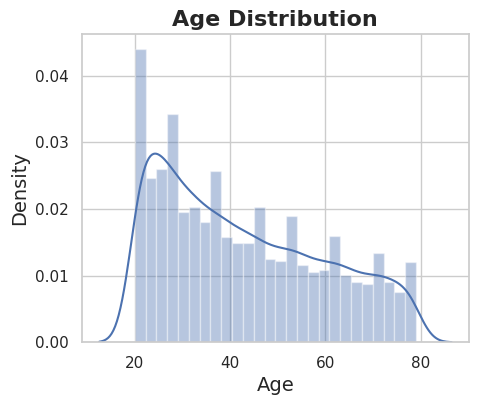

In [ ]:
# Distribution of 'Age' column.
plt.figure(figsize=(5,4))
sns.distplot(calories_data['Age'])
plt.title('Age Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

<ipython-input-13-d46ab3acbfed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


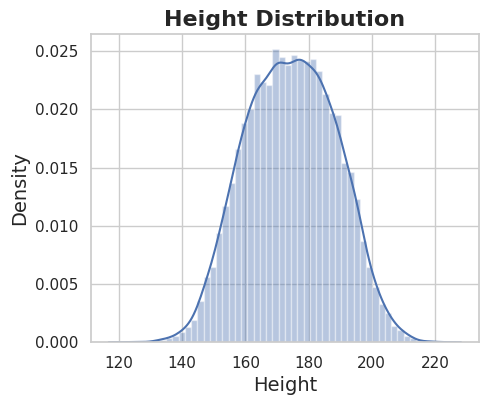

In [ ]:
# Distribution of 'Height' column.
plt.figure(figsize=(5,4))
sns.distplot(calories_data['Height'])
plt.title('Height Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Height',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

<ipython-input-14-dfa4647c9253>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


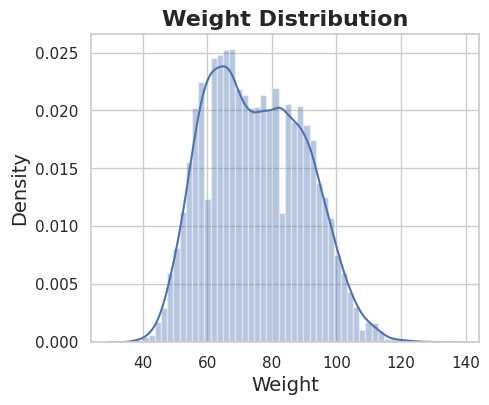

In [ ]:
# Distribution of 'Weight' column.
plt.figure(figsize=(5,4))
sns.distplot(calories_data['Weight'])
plt.title('Weight Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Weight',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

<ipython-input-15-ae510df1ed41>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


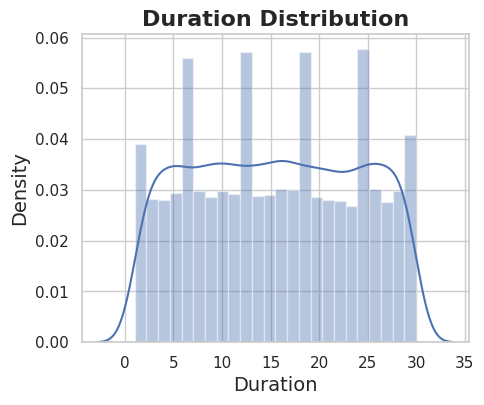

In [ ]:
# Distribution of 'Duration' column.
plt.figure(figsize=(5,4))
sns.distplot(calories_data['Duration'])
plt.title('Duration Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Duration',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

<ipython-input-16-cfaec5942e0b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


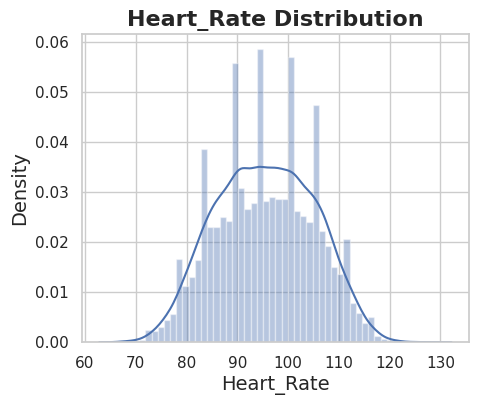

In [ ]:
# Distribution of 'Heart_Rate' column.
plt.figure(figsize=(5,4))
sns.distplot(calories_data['Heart_Rate'])
plt.title('Heart_Rate Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Heart_Rate',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

<Figure size 500x400 with 0 Axes>

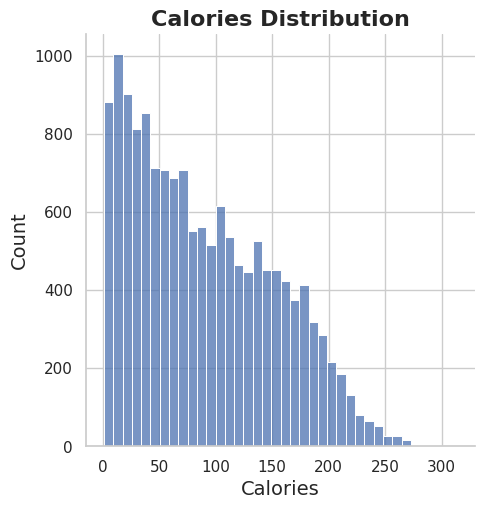

In [ ]:
# Distribution of 'Calories' column.
plt.figure(figsize=(5,4))
sns.displot(calories_data['Calories'])
plt.title('Calories Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Calories',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

<ipython-input-18-a9611c9c8324>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


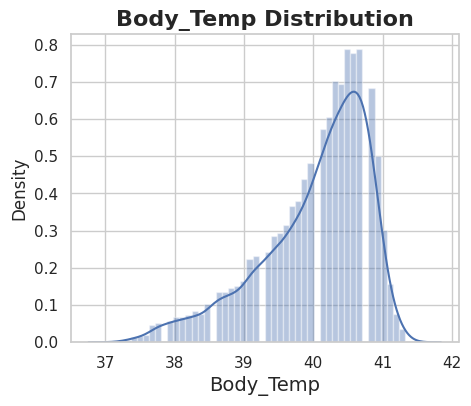

In [ ]:
# Distribution of 'Body_Temp' column.
plt.figure(figsize=(5,4))
sns.distplot(calories_data['Body_Temp'])
plt.title('Body_Temp Distribution',fontsize=16,fontweight='bold')
plt.xlabel('Body_Temp',fontsize=14)
plt.show()

# Finding the Correlation in the dataset.
###       1. Positive Correlation
###       2. Negative Correlation

<Axes: >

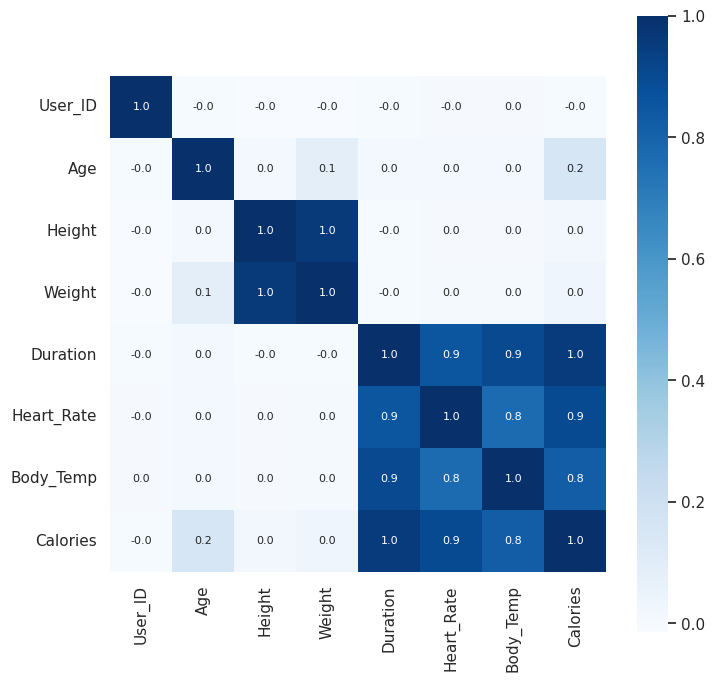

In [ ]:
correlation=calories_data.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Converting the Text data to Numerical Values

In [ ]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

<ipython-input-20-4ffac1eaf455>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)


In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating Features and Target

In [ ]:
x=calories_data.drop(columns=['User_ID','Calories'],axis=1)
y=calories_data['Calories']

In [ ]:
x.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
y.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


Splitting the Data into Test and Training Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [ ]:
# Predicting on test data.
test_data_prediction=model.predict(x_test)
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [ ]:
# MEAN ABSOLUTE ERROR
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print(mae)

1.4833678883314132


In [ ]:
# PREDICTIVE SYSTEM

In [ ]:
input_data=(0,60,186,94,21,97,40.4)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[132.86945]


# ***END***